In [15]:
from ultralytics import YOLO

# Load a model

model = YOLO("models/best.pt")  # load a custom model

# Predict with the model
results = model("IMG-20240704-WA0002.jpg")  # predict on an image


image 1/1 /home/khushwant/csai/Experiments/IMG-20240704-WA0002.jpg: 640x640 1 Khushwant, 5.9ms
Speed: 1.9ms preprocess, 5.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


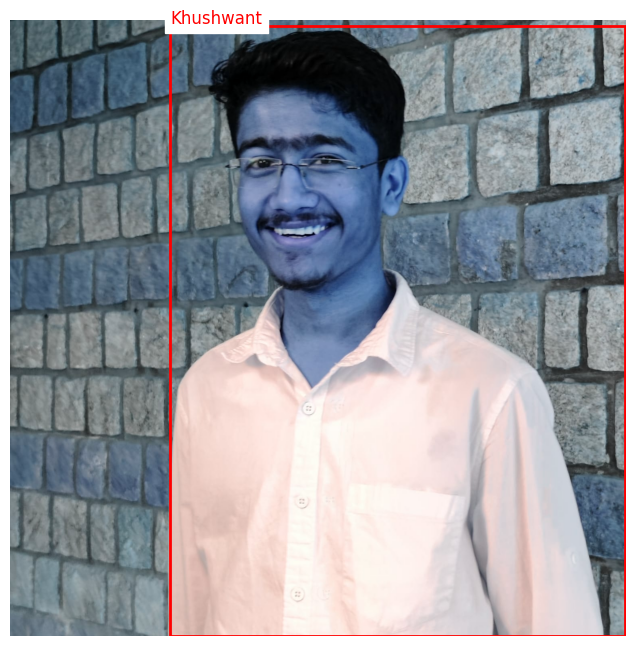

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def plot_yolo_results(results):
    # Extract the first result if it's a list (usually a single result will be in the list)
    result = results[0] if isinstance(results, list) else results
    
    # Extract the original image from the result (this is a NumPy array)
    img_np = result.orig_img

    # Extract the bounding boxes and corresponding class labels
    boxes = result.boxes
    names = result.names

    # Plot the image
    plt.figure(figsize=(10, 8))
    plt.imshow(img_np)

    # Loop through the boxes and draw them on the image
    for i, box in enumerate(boxes.xyxy):  # Iterate over bounding boxes
        x1, y1, x2, y2 = box.cpu().numpy()  # Convert tensor to NumPy array
        
        # Draw the rectangle (bounding box)
        plt.gca().add_patch(
            plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor='red', linewidth=2, fill=False)
        )
        
        # Display the class label (name)
        label = names[int(boxes.cls[i].cpu().numpy())]  # Get class name
        plt.text(
            x1, y1 - 5, label, color='red', fontsize=12, backgroundcolor='white'
        )
    
    plt.axis('off')
    plt.show()

# Example usage:
# Assuming `results` is a list of results from YOLO model inference
plot_yolo_results(results)
